<a href="https://colab.research.google.com/github/Sindhura-tr/Deep-Learning-2-30-4-30/blob/main/Text_Classification_Sentiment_Analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sentiment Analysis

In [1]:
path= r"https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/Restaurant_Reviews.tsv"
import pandas as pd
df = pd.read_csv(path,sep="\t")
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


## Text Preprocessing
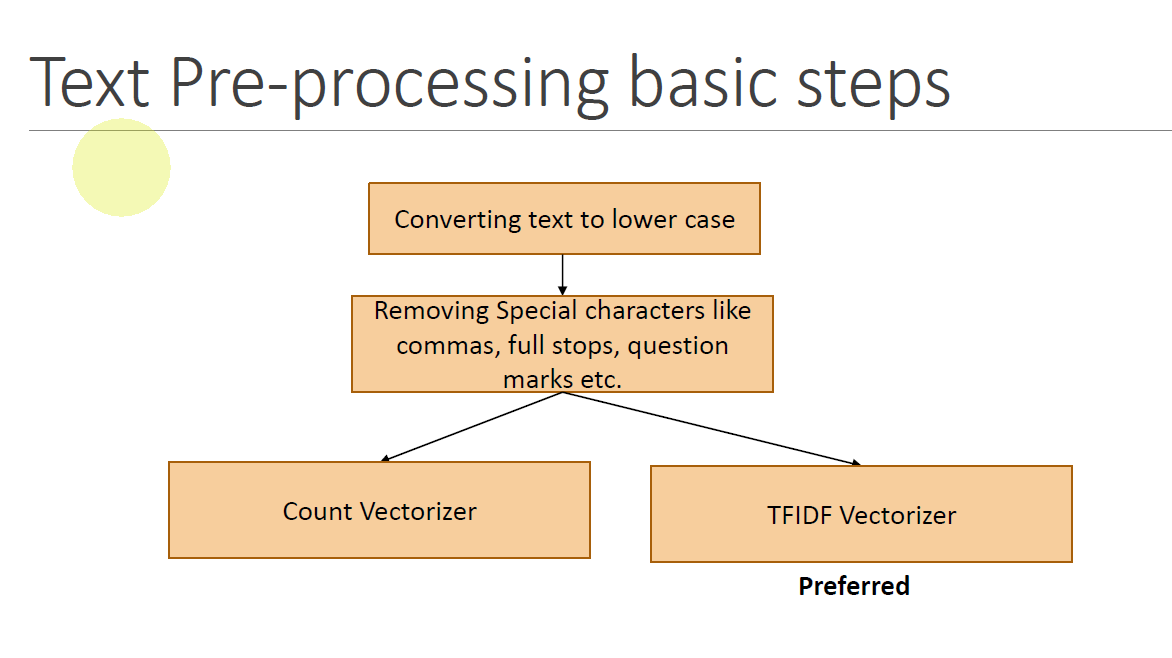

In [2]:
data1 = df['Review'][0]
data1

'Wow... Loved this place.'

In [3]:
data1 = data1.lower()

In [4]:
import re

In [5]:
pattern = "[^a-z ]" # ^-not

In [6]:
re.sub(pattern,"",data1)

'wow loved this place'

In [7]:
def preprocess_text(text):
  # convert all the text data to lower case
  text = text.lower()
  # replace the unnecessary/insignificant letters/special characters with blank string
  pattern = "[^a-z ]"
  text_new = re.sub(pattern,"",text)
  return text_new

In [8]:
df["Review"]

,Review
0,Wow... Loved this place.
1,Crust is not good.
2,Not tasty and the texture was just nasty.
3,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...
...,...
995,I think food should have flavor and texture an...
996,Appetite instantly gone.
997,Overall I was not impressed and would not go b...
998,"The whole experience was underwhelming, and I ..."


In [9]:
df["Preprocessed_Review"] = df["Review"].apply(preprocess_text)
df.head()

,Review,Liked,Preprocessed_Review
0,Wow... Loved this place.,1,wow loved this place
1,Crust is not good.,0,crust is not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...


## Separate X and Y features

In [10]:
X = df["Preprocessed_Review"]
Y = df["Liked"]

In [11]:
X.head()

,Preprocessed_Review
0,wow loved this place
1,crust is not good
2,not tasty and the texture was just nasty
3,stopped by during the late may bank holiday of...
4,the selection on the menu was great and so wer...


In [12]:
Y.head()

,Liked
0,1
1,0
2,0
3,1
4,1


In [13]:
X.shape

(1000,)

In [14]:
Y.shape

(1000,)

## TFIDF:
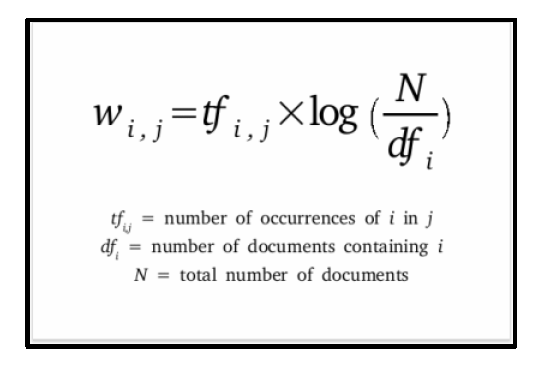

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
tfidf = TfidfVectorizer()

In [17]:
xpre = tfidf.fit_transform(X).toarray()

In [18]:
xpre.shape

(1000, 2046)

In [19]:
xpre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
xpre[0]

array([0., 0., 0., ..., 0., 0., 0.])

## Apply train test split

In [21]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(xpre,Y,train_size=0.8,random_state=21)

In [22]:
xtrain.shape

(800, 2046)

In [23]:
xtest.shape

(200, 2046)

## Build the Neural Network

In [24]:
from keras.models import Sequential
from keras.layers import Input,Dense,Dropout
from keras.callbacks import EarlyStopping

In [25]:
# Initialize the model
model = Sequential()
# add the input layer
model.add(Input(shape=(xtrain.shape[1],)))
# add the hidden layer1
model.add(Dense(units=64,activation="relu"))
# add the dropout layer
model.add(Dropout(rate=0.4))
# add the hidden layer2
model.add(Dense(units=32,activation="relu"))
# add the dropout layer
model.add(Dropout(rate=0.2))
# add the output layer
model.add(Dense(units=1,activation="sigmoid"))

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │       131,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,121 (520.00 KB)

 Trainable params: 133,121 (520.00 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [33]:
es = EarlyStopping(monitor="val_loss",patience=10)

In [34]:
hist = model.fit(xtrain,ytrain,validation_split=0.2,epochs=200,callbacks=[es])

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0053 - val_accuracy: 0.7625 - val_loss: 0.5928
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 0.7688 - val_loss: 0.5973
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 0.7688 - val_loss: 0.6394
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 0.7688 - val_loss: 0.6454
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.7750 - val_loss: 0.6494
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.7750 - val_loss: 0.6583
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.7750 - val_loss: 0.6680
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.7688 - v

## EVALUATE THE MODEL

In [35]:
model.evaluate(xtrain,ytrain)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9935 - loss: 0.0204     


[0.13947877287864685, 0.9549999833106995]

In [36]:
model.evaluate(xtest,ytest)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8394 - loss: 0.4903 


[0.6009831428527832, 0.7950000166893005]

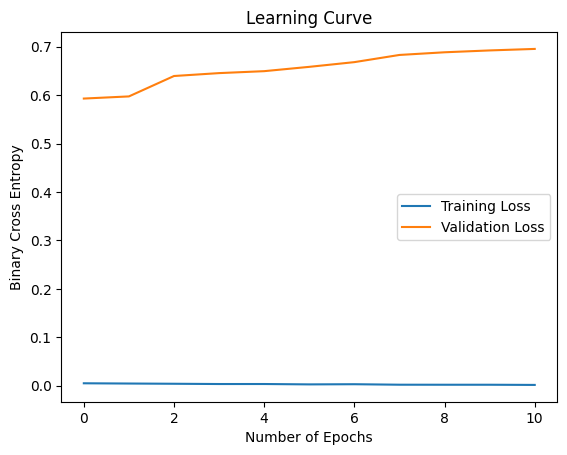

In [37]:
## Learning curve
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"],label="Training Loss")
plt.plot(hist.history["val_loss"],label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Binary Cross Entropy")
plt.legend()
plt.title("Learning Curve")
plt.show()

In [38]:
probs = model.predict(xtest)
probs[:5]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[4.4325641e-01],
       [4.4856351e-04],
       [9.9683064e-01],
       [9.9997139e-01],
       [9.9988401e-01]], dtype=float32)

In [39]:
preds = [1 if prob>0.5 else 0 for prob in probs]
preds[:5]

[0, 0, 1, 1, 1]

In [59]:
def preprocess_predict(text):
  new_text = preprocess_text(text)
  text_pre = tfidf.transform([new_text])
  prob = model.predict(text_pre)
  if prob>0.5:
    return 1
  else:
    return 0

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report

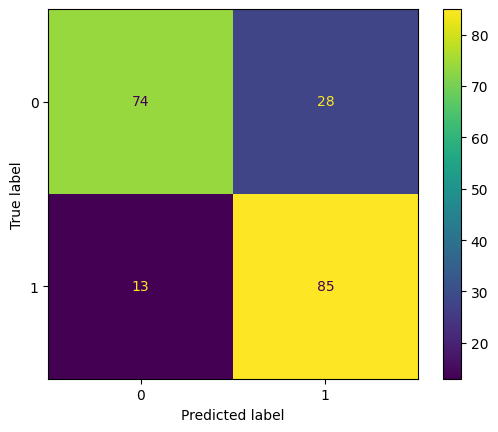

In [42]:
cf = confusion_matrix(ytest,preds)
ConfusionMatrixDisplay.from_predictions(ytest,preds)

In [43]:
print(classification_report(ytest,preds))

              precision    recall  f1-score   support

           0       0.85      0.73      0.78       102
           1       0.75      0.87      0.81        98

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.79       200
weighted avg       0.80      0.80      0.79       200



## ROC - Area under the curve

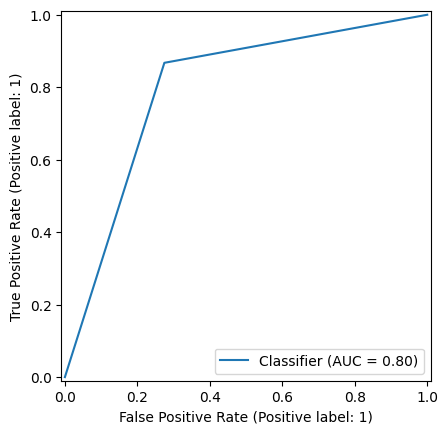

In [44]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(ytest,preds)

## Above model provides AUC as 0.80 which is a good score to consider for final predictions

## Final predictions

In [45]:
text = "It took over 30 min to get their pizza, which was nothing like pizza"

In [46]:
new_text = preprocess_text(text)

In [47]:
text_pre = tfidf.transform([new_text]).toarray()

In [48]:
text_pre

array([[0., 0., 0., ..., 0., 0., 0.]])

In [49]:
prob = model.predict(text_pre)
prob

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


array([[0.00427042]], dtype=float32)

In [51]:
if prob>0.5:
  print(1)
else:
  print(0)

0


In [60]:
t2 = "We waited for thirty minutes in vain"
op = preprocess_predict(t2)
print(op)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
0


In [61]:
t3 = "this was a different cut than the piece the other day but still wonderful and tender s well as well flavored."
op2 = preprocess_predict(t3)
print(op2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
1


## save the model

In [52]:
model.save("SentimentAnalysis.keras")

In [53]:
from keras.models import load_model
m1 = load_model('/content/SentimentAnalysis.keras')
m1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │       131,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 399,365 (1.52 MB)

 Trainable params: 133,121 (520.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 266,244 (1.02 MB)